# Blenheim Chalcot Data Science Challenge: Section 1

## Section 2: Buisness Optimisation

Conduct any required exploration and leverage appropriate transformations and machine learning techniques to understand the factors which contribute to the Lifetime impact of 12 different Facebook posts.

I will be using the features (category, page total likes, type, month, hour, weekday, paid) to predict the performance metrics which are the rest of the features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("dataset_Facebook.csv", delimiter=";")

In [3]:
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


Let's remove all the N/A values in the data as these wont work with our models.

In [4]:
data.dropna(inplace=True)

In [5]:
features = ["Category", "Page total likes", "Type", "Post Month",
           "Post Hour", "Post Weekday", "Paid"]

feature_data = data[features]
label_data = data.drop(features, axis=1)

In [6]:
feature_data.head()

,Category,Page total likes,Type,Post Month,Post Hour,Post Weekday,Paid
0,2,139441,Photo,12,3,4,0.0
1,2,139441,Status,12,10,3,0.0
2,3,139441,Photo,12,3,3,0.0
3,2,139441,Photo,12,10,2,1.0
4,2,139441,Photo,12,3,2,0.0


In [7]:
label_data.head()

,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


Firstly, I am choosing the target variable to be "Total Interactions" as this is a combinations of all the other label features. It is also a good for our purposes as it's highly correlated with the "lifetime" features which are our features of interest.

In [8]:
label = data[["Total Interactions"]]
label.head()

,Total Interactions
0,100
1,164
2,80
3,1777
4,393


## Machine Learning Model

As our feature table has both numeric and categorical variables, I am going to one-hot-encode the data so a machine learning model can interpret the data.

In [9]:
features = pd.get_dummies(feature_data)
features.head()

,Category,Page total likes,Post Month,Post Hour,Post Weekday,Paid,Type_Link,Type_Photo,Type_Status,Type_Video
0,2,139441,12,3,4,0.0,0,1,0,0
1,2,139441,12,10,3,0.0,0,0,1,0
2,3,139441,12,3,3,0.0,0,1,0,0
3,2,139441,12,10,2,1.0,0,1,0,0
4,2,139441,12,3,2,0.0,0,1,0,0


Let's look at the correlation of each variable to reduce my features down.

In [10]:
corr_matrix = features.corr()
corr_matrix.style.background_gradient()

,Category,Page total likes,Post Month,Post Hour,Post Weekday,Paid,Type_Link,Type_Photo,Type_Status,Type_Video
Category,1,-0.0849252,-0.121637,-0.106965,-0.0450164,-0.0278178,-0.189884,0.110521,0.0502138,-0.12461
Page total likes,-0.0849252,1,0.940892,-0.150466,-0.0126846,0.00940589,-0.0907309,-0.125785,0.185074,0.0876135
Post Month,-0.121637,0.940892,1,-0.181316,0.00969392,-0.0148869,-0.0285757,-0.171476,0.195276,0.0922727
Post Hour,-0.106965,-0.150466,-0.181316,1,0.0459799,-0.0691429,-0.104232,0.0872848,-0.0433126,0.0237817
Post Weekday,-0.0450164,-0.0126846,0.00969392,0.0459799,1,0.00325001,0.0148187,-0.0534342,0.0692793,-0.0331732
Paid,-0.0278178,0.00940589,-0.0148869,-0.0691429,0.00325001,1,-0.003878,0.00983101,-0.0412255,0.077453
Type_Link,-0.189884,-0.0907309,-0.0285757,-0.104232,0.0148187,-0.003878,1,-0.514406,-0.0681994,-0.0258297
Type_Photo,0.110521,-0.125785,-0.171476,0.0872848,-0.0534342,0.00983101,-0.514406,1,-0.754267,-0.28567
Type_Status,0.0502138,0.185074,0.195276,-0.0433126,0.0692793,-0.0412255,-0.0681994,-0.754267,1,-0.0378738
Type_Video,-0.12461,0.0876135,0.0922727,0.0237817,-0.0331732,0.077453,-0.0258297,-0.28567,-0.0378738,1


Here I have split up the "Type" feature into 4 other feature vectors with binary inputs

In [11]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2,
                                                   random_state=42)

C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer, f1_score

In [13]:
def train_model(model,title, parameters=None):
    """This function fits the data to our model.
    Uses GridSearchCV to find the best parameters for each model.
    Implements the new parameters.
    Plots a learning curve to show how the model performs.
    Prints accuracy scores for train and Validation set.
    NOTE: Function takes longer to compute with more parameter values"""
    
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_train)
    scorer = make_scorer(mean_squared_error)
    
    print("Model training accuracy score before parameters:",
          mean_squared_error(y_train,y_pred))
    
    if parameters is not None:
        grid_obj = GridSearchCV(model, parameters, scoring=scorer)
        grid_fit = grid_obj.fit(X_train,y_train.values.ravel())
        best_clf = grid_fit.best_estimator_
        best_clf.fit(X_train,y_train)
        y_pred_gridsearch = best_clf.predict(X_train)
        model = best_clf
        print("Model mean squared error:", mean_squared_error(y_train, y_pred_gridsearch) 
              )
        print(best_clf)
    
    train_sizes, train_scores, val_scores = learning_curve(model,
                                                           X_train,
                                                           y_train,
                                                           train_sizes=np.linspace(0.1, 1.0, 5))

    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    fig = plt.figure(figsize=(7.5,5))
    plt.plot(train_scores_mean, label="Train Scores")
    plt.plot(val_scores_mean, label="Validation Scores")
    plt.xlabel("Training examples (Standard Devation)")
    plt.ylabel("Score")
    plt.suptitle("Learning curve for model: {}".format(title))
    plt.legend(loc="best")
    plt.show()
    fig.savefig("{}.png".format(title))

In [14]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()

sgd_reg.fit(X_train, y_train)

y_pred = sgd_reg.predict(X_train)



C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Nikhil\Anaconda3\lib\si

Model training accuracy score before parameters: 4.808621254718167e+37


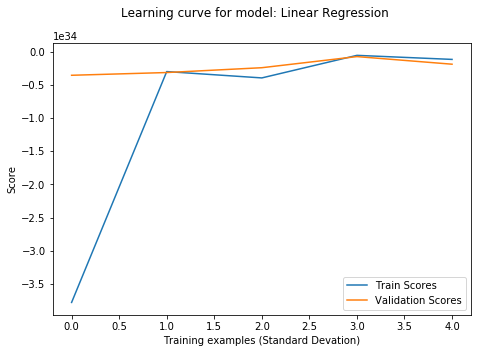

In [15]:
train_model(sgd_reg, "Linear Regression")

Model training accuracy score before parameters: 152.8989898989899


C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Model mean squared error: 183468.4292929293
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


C:\Users\Nikhil\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


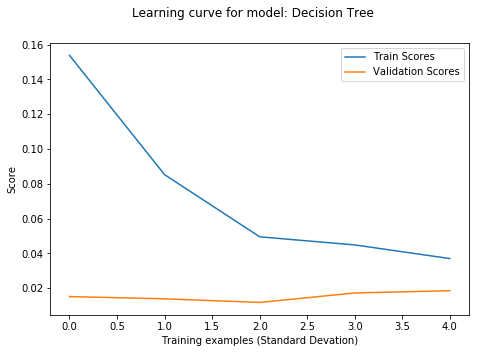

In [16]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
parameters = {"max_depth": [1,2,3,4],
              "min_samples_leaf": [1,2,3,4],
              "min_samples_split": [2,3,4]}

train_model(dec_tree, "Decision Tree", parameters)

## What are the best features for predicting total interactions?

In [17]:
model = dec_tree.fit(X_train, y_train)
important_features = model.feature_importances_

important_features.shape

(10,)

In [18]:
feat_col = ["Category","Page total likes","Post Month",
            "Post Hour","Post Weekday","Paid","Type_Link",
            "Type_Photo","Type_Status","Type_Video"]

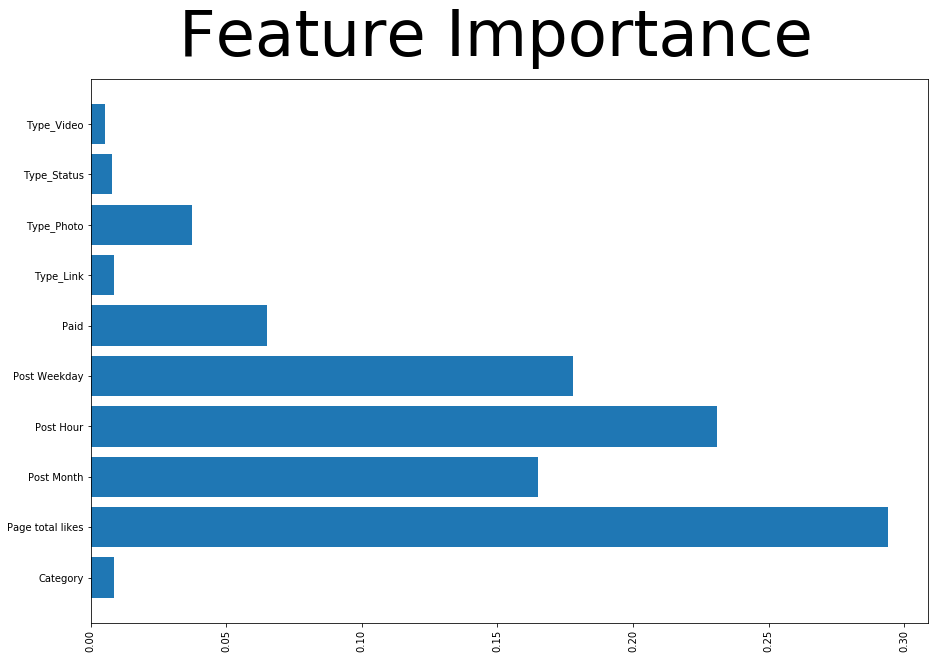

In [19]:
fig = plt.figure(figsize=(15,10))
plt.barh(feat_col, important_features)
plt.xticks(rotation='vertical')
plt.suptitle("Feature Importance", fontsize=64)
plt.show()
fig.savefig("feature importance.png")

This tells us what features are most important with Total Interaction with posts.